In [86]:
import scipy.constants as c
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (15,10)
berry_area = 4

In [87]:
b1 = pd.read_csv("berry1_IV.csv")
b1d_v = b1['V']
b1d_i = b1['I']
b1l_v = b1['V.1']
b1l_i = b1['I.1']
b1

,berry1_dark,V,I,berry1_light,V.1,I.1
0,NaN,1.00,0.01050,NaN,1.00,0.00924
1,NaN,0.98,0.00870,NaN,0.98,0.00771
2,NaN,0.96,0.00794,NaN,0.96,0.00701
3,NaN,0.94,0.00722,NaN,0.94,0.00635
4,NaN,0.92,0.00656,NaN,0.92,0.00572
...,...,...,...,...,...,...
96,NaN,-0.92,-0.00186,NaN,-0.92,-0.00254
97,NaN,-0.94,-0.00201,NaN,-0.94,-0.00267
98,NaN,-0.96,-0.00216,NaN,-0.96,-0.00280
99,NaN,-0.98,-0.00232,NaN,-0.98,-0.00295


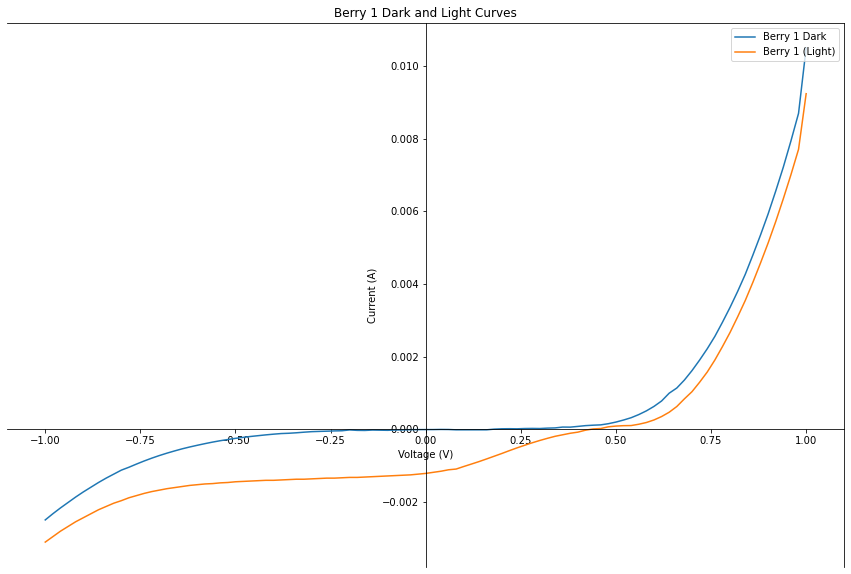

In [88]:
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.plot(b1d_v, b1d_i, label ='Berry 1 Dark')
plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.title("Berry 1 Dark and Light Curves")

plt.plot(b1l_v, b1l_i, label='Berry 1 (Light)')
legend = ax.legend(loc='upper right')

plt.show()


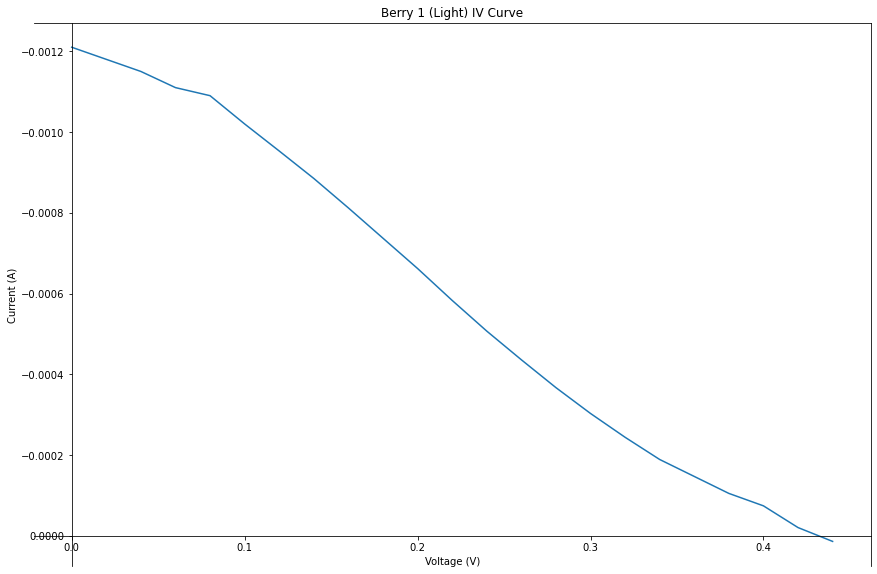

In [89]:
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
    

cleanedb1 = [x for x in list(zip(b1l_v, b1l_i)) if x[0] >= 0 and x[1]<= .000025]
cleanedv = [x[0] for x in cleanedb1]
cleanedi = [x[1] for x in cleanedb1]


plt.plot(cleanedv, cleanedi)
plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.gca().invert_yaxis()

plt.title("Berry 1 (Light) IV Curve")
plt.show()




In [90]:
# Calculations for Berry 1
# ISC, VOC, Max Power P_max, Max Power Point(V_mp, I_mp), Fill Factor, Shunt Resistance, Series Resistance
import math


b1data = list(zip(b1l_v, b1l_i))

#Voltage is at Zero
b1_isc = -1*[x for x in b1data if x[0] == 0][0][1]
print("Berry 1 ISC: " + str(b1_isc) + " A")
print("Berry 1 JSC: " + str(b1_isc/berry_area) + " A/cm^2")


#When Current is at Zero
b1_voc = math.inf
b1_i_smallest = 1000
for x in b1data:
    x_v, x_i = x
    if(abs(x_i) <= b1_i_smallest):
        b1_i_smallest = abs(x_i)
        b1_voc = x_v
print("Berry 1 VOC: " + str(b1_voc) + " V")
print(b1_i_smallest)

# Multiply ISC x VOC
b1_theo_max = b1_isc * b1_voc
print("Theoretical Maximum Power (ISC x VOC): " + str(b1_theo_max) + " W")

b1_p_max = max([-1*x[0] *x[1] for x in b1data])
b1_best_IV_power_point = [x for x in b1data if  -1*x[0] *x[1] == b1_p_max][0]
print("Max Power: " + str(b1_p_max) + " W")
print("Max Power Density: " + str(b1_p_max/berry_area) + " W/cm^2")

print("V_mp: " + str(b1_best_IV_power_point[0]) + " V")
print("I_mp: " + str(-1*b1_best_IV_power_point[1]) + " A")

print("Fill Factor: " + str(b1_p_max/ b1_theo_max))


Berry 1 ISC: 0.00121 A
Berry 1 JSC: 0.0003025 A/cm^2
Berry 1 VOC: 0.44 V
1.39e-05
Theoretical Maximum Power (ISC x VOC): 0.0005323999999999999 W
Max Power: 0.00013266 W
Max Power Density: 3.3165e-05 W/cm^2
V_mp: 0.18 V
I_mp: 0.000737 A
Fill Factor: 0.2491735537190083


In [97]:
b1_pre_breakdown = [x for x in list(zip(b1d_v, b1d_i)) if x[0] == -0.24][0]
print("Shunt Resistance: " + str(b1_pre_breakdown[0]/ b1_pre_breakdown[1]/berry_area) + " Ohms/cm^2")

# Series Resistance
b1_i0 = 1e-12
b1_v, b1_i = list(zip(b1d_v, b1d_i))[0][0], list(zip(b1d_v, b1d_i))[0][1]
b1_diode_v = math.log((b1_i/b1_i0)+1)*300*c.k/c.e
b1_series = (b1_v - b1_diode_v)/ b1_i
print("Series Resistance: " + str(b1_series/berry_area) + " Ohms/cm^2")


list(zip(b1d_v, b1d_i))[0][0]

Shunt Resistance: 1485.148514851485 Ohms/cm^2
Series Resistance: 9.606532937155533 Ohms/cm^2


1.0

In [92]:
# print(list(zip(cleanedv, cleanedi)))
cleaned_b1 = [x for x in list(zip(b1l_v, b1l_i)) if x[0] >= 0 and x[1]<= .000025]
cleaned_b1_v = [x[0] for x in cleanedb1]
cleaned_b1_i = [x[1] for x in cleanedb1]

b1_A = np.transpose(np.vstack((cleaned_b1_v[0: 5], np.ones(5))))
b1_y = np.transpose(cleaned_b1_i[0: 5])
x1, x2 = np.linalg.lstsq(b1_A, b1_y, rcond=None)[0]

print("RS Slope: " + str(1/x1/berry_area) + " Ohms/cm^2")


b1_A = np.transpose(np.vstack((cleaned_b1_v[-5:], np.ones(5))))
b1_y = np.transpose(cleaned_b1_i[-5:])
x1, x2 = np.linalg.lstsq(b1_A, b1_y, rcond=None)[0]
#print(x1, x2)
print("RSH Slope: " + str(1/x1/berry_area) + " Ohms/cm^2")

RS Slope: 123.03149606299232 Ohms/cm^2
RSH Slope: 161.29032258064646 Ohms/cm^2


In [93]:
b2 = pd.read_csv("berry2_IV.csv")
b2d_v = b2['V']
b2d_i = b2['I']
b2l_v = b2['V.1']
b2l_i = b2['I.1']
b2

,berry2_dark,V,I,berry2_light,V.1,I.1
0,NaN,1.00,0.01060,NaN,1.00,0.01110
1,NaN,0.98,0.00984,NaN,0.98,0.01030
2,NaN,0.96,0.00915,NaN,0.96,0.00947
3,NaN,0.94,0.00848,NaN,0.94,0.00874
4,NaN,0.92,0.00784,NaN,0.92,0.00803
...,...,...,...,...,...,...
96,NaN,-0.92,-0.00464,NaN,-0.92,-0.00553
97,NaN,-0.94,-0.00492,NaN,-0.94,-0.00582
98,NaN,-0.96,-0.00520,NaN,-0.96,-0.00612
99,NaN,-0.98,-0.00548,NaN,-0.98,-0.00642


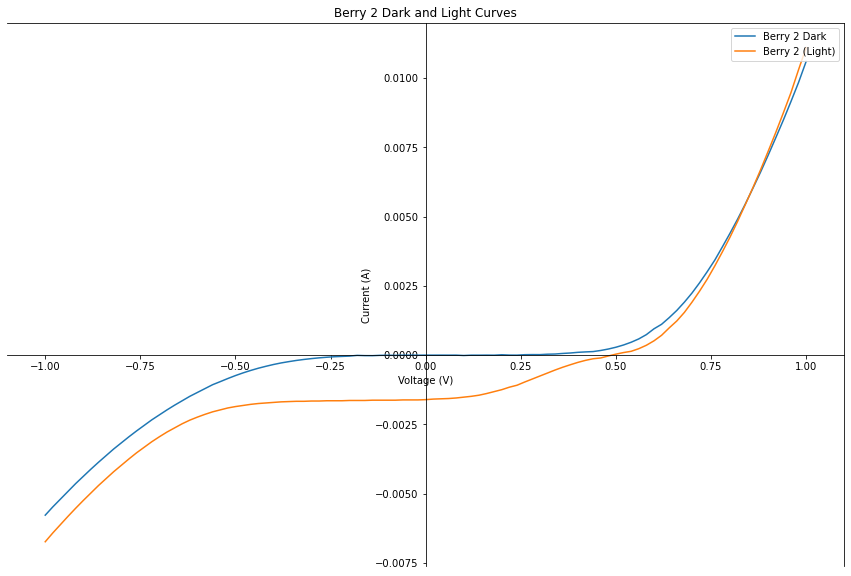

In [94]:
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.plot(b2d_v, b2d_i, label ='Berry 2 Dark')
plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.title("Berry 2 Dark and Light Curves")

plt.plot(b2l_v, b2l_i, label='Berry 2 (Light)')
legend = ax.legend(loc='upper right')

plt.show()

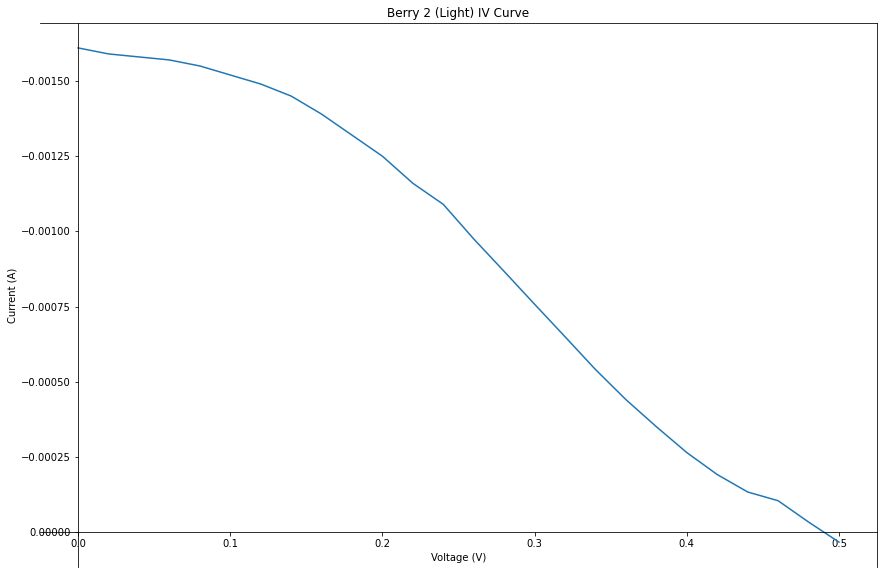

In [95]:
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
    

cleanedb2 = [x for x in list(zip(b2l_v, b2l_i)) if x[0] >= 0 and x[1]<= 0.00005]
cleanedv2 = [x[0] for x in cleanedb2]
cleanedi2 = [x[1] for x in cleanedb2]


plt.plot(cleanedv2, cleanedi2)
plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.gca().invert_yaxis()

plt.title("Berry 2 (Light) IV Curve")
plt.show()



In [96]:
# Calculations for Berry 2
# ISC, VOC, Max Power P_max, Max Power Point(V_mp, I_mp), Fill Factor, Shunt Resistance, Series Resistance
import math
b2data = list(zip(b2l_v, b2l_i))

b2_isc = [x for x in b2data if x[0] == 0][0]
print("Berry 2 ISC: " + str(-1*b2_isc[1]) + " A")
print("Berry 2 JSC: " + str(-1*b2_isc[1]/berry_area) + " A/cm^2")


b2_voc = math.inf
b2_smallest = 1000
for x in b2data:
    x_v, x_i = x
    if(abs(x_i) <= b2_smallest):
        b2_smallest = abs(x_i)
        b2_voc = x_v
print("Berry 2 VOC: " + str(b2_voc) + " V")


b2_theo_max = -1*b2_isc[1] * b2_voc
print("Theoretical Maximum Power (ISC x VOC): " + str(b2_theo_max) + " W")


b2_p_max = max([-1*x[0] *x[1] for x in b2data])
b2_best_IV_power = [x for x in b2data if  -1*x[0] *x[1] == b2_p_max][0]
print("Max Power: " + str(b2_p_max) + " W")
print("Max Power Density: " + str(b2_p_max/berry_area) + " W/cm^2")

print("V_mp: " + str(b2_best_IV_power[0]) + " V")
print("I_mp: " + str(-1*b2_best_IV_power[1]) + " A")

print("Fill Factor: " + str(b2_p_max/ b2_theo_max))


Berry 2 ISC: 0.00161 A
Berry 2 JSC: 0.0004025 A/cm^2
Berry 2 VOC: 0.5 V
Theoretical Maximum Power (ISC x VOC): 0.000805 W
Max Power: 0.0002616 W
Max Power Density: 6.54e-05 W/cm^2
V_mp: 0.24 V
I_mp: 0.00109 A
Fill Factor: 0.3249689440993789


In [73]:
b2_pre_breakdown = [x for x in list(zip(b2d_v, b2d_i)) if x[0] == -0.24][0]
print("Shunt Resistance: " + str(b2_pre_breakdown[0]/ b2_pre_breakdown[1]/berry_area) + " Ohms/cm^2")


# Series Resistance
b2_i0 = 1e-12
b2_v = list(zip(b2d_v, b2d_i))[0][0]
b2_i = list(zip(b2d_v, b2d_i))[0][1]
b2_diode_v = math.log((b2_i/b2_i0)+1)*300*c.k/c.e

#print(b2_diode_v)

b2_series = (b2_v - b2_diode_v)/ b2_i
print("Series Resistance: " + str(b2_series/berry_area) + " Ohms/cm^2")


Shunt Resistance: 990.09900990099 Ohms/cm^2
Series Resistance: 9.510125916836486 Ohms/cm^2


In [74]:
cleanedb2 = [x for x in list(zip(b2l_v, b2l_i)) if x[0] >= 0 and x[1]<= 0.00005]
cleaned_b2_v = [x[0] for x in cleanedb2]
cleaned_b2_i = [x[1] for x in cleanedb2]

b1_A = np.transpose(np.vstack((cleaned_b2_v[0: 5], np.ones(5))))
b1_y = np.transpose(cleaned_b2_i[0: 5])
x1, x2 = np.linalg.lstsq(b1_A, b1_y, rcond=None)[0]
#print(x1, x2)
print("RS Slope: " + str(1/x1/berry_area) + " Ohms/cm^2")



b1_A = np.transpose(np.vstack((cleaned_b2_v[-5:], np.ones(5))))
b1_y = np.transpose(cleaned_b2_i[-5:])
x1, x2 = np.linalg.lstsq(b1_A, b1_y, rcond=None)[0]
#print(x1, x2)
print("RSH Slope: " + str(1/x1/berry_area) + " Ohms/cm^2")

#print(list(zip(cleanedv2, cleanedi2)))

RS Slope: 91.10787172011669 Ohms/cm^2
RSH Slope: 357.1428571428599 Ohms/cm^2


In [75]:
dssc = pd.read_csv("DSSC_IV.csv")
dssc_d_v  = dssc['V']
dssc_d_i  = dssc['I']
dssc_l_v = dssc['V.1']
dssc_l_i = dssc['I.1']
dssc

,DSSC IV,V,I,DSSC IV.1,V.1,I.1
0,Dark,0.0000,-2.070000e-08,Light,0.0000,-0.000211
1,NaN,0.0075,1.080000e-07,NaN,0.0075,-0.000211
2,NaN,0.0150,1.460000e-07,NaN,0.0150,-0.000210
3,NaN,0.0225,2.200000e-07,NaN,0.0225,-0.000209
4,NaN,0.0300,2.950000e-07,NaN,0.0300,-0.000209
...,...,...,...,...,...,...
96,NaN,0.7200,4.762000e-04,NaN,0.7200,0.000338
97,NaN,0.7275,5.274000e-04,NaN,0.7275,0.000389
98,NaN,0.7350,5.805000e-04,NaN,0.7350,0.000428
99,NaN,0.7425,6.381000e-04,NaN,0.7425,0.000480


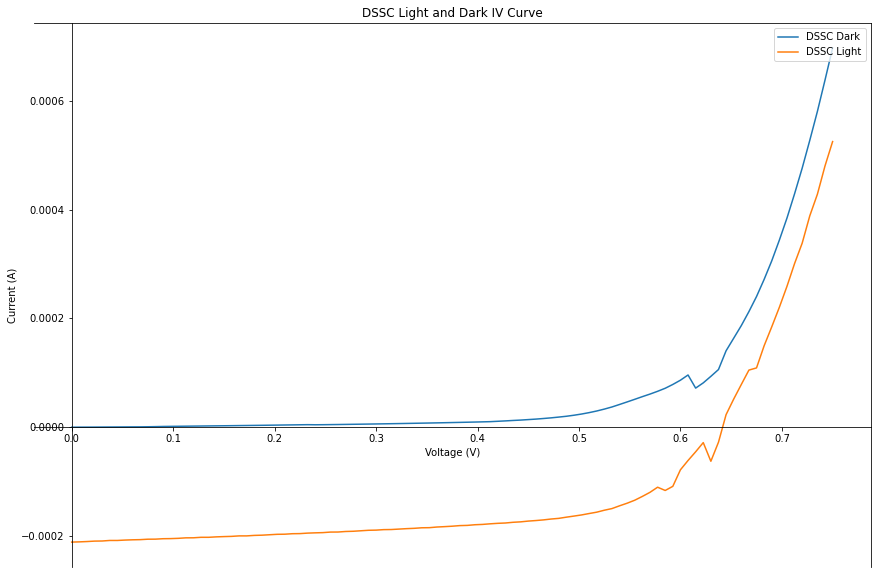

In [81]:
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.plot(dssc_d_v, dssc_d_i, label="DSSC Dark")

plt.plot(dssc_l_v, dssc_l_i, label="DSSC Light")

plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.title("DSSC Light and Dark IV Curve")
legend = ax.legend(loc='upper right')
plt.show()

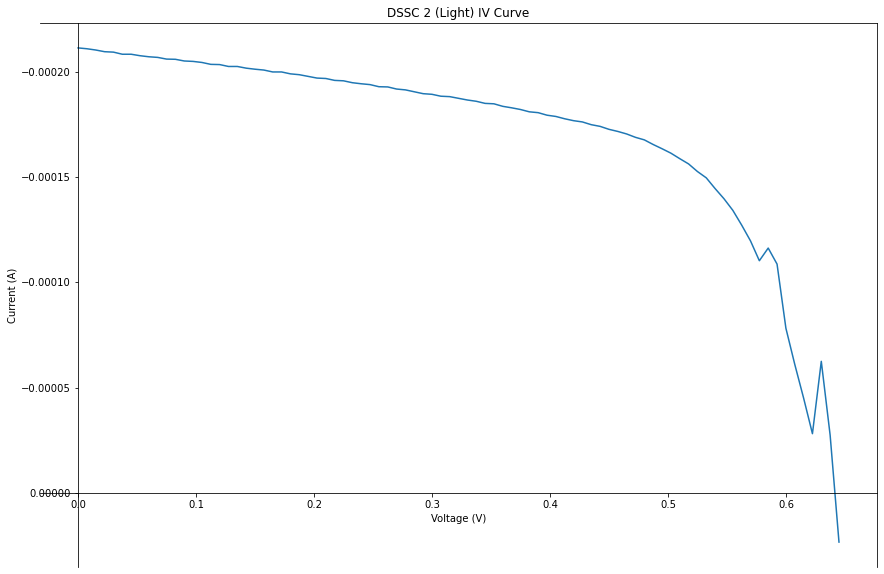

In [82]:
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
    

cleaned_dssc = [x for x in list(zip(dssc_l_v, dssc_l_i)) if x[0] >= 0 and x[1]<= 0.00005]
cleaned_dssc_v = [x[0] for x in cleaned_dssc]
cleaned_dssc_i = [x[1] for x in cleaned_dssc]

plt.plot(cleaned_dssc_v, cleaned_dssc_i)
plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.gca().invert_yaxis()

plt.title("DSSC 2 (Light) IV Curve")
plt.show()


In [83]:
import math
dssc_data = list(zip(dssc_l_v, dssc_l_i))
dssc_area = 0.5*0.5

dssc_isc = [x for x in dssc_data if x[0] == 0][0]
print("DSSC ISC: " + str(-1*dssc_isc[1]) + " A")
print("DSSC JSC: " + str(-1*dssc_isc[1]/ dssc_area) + " A/cm^2")

dssc_voc = math.inf
dssc_smallest = 1000
for x in dssc_data:
    x_v, x_i = x
    if(abs(x_i) <= dssc_smallest):
        dssc_smallest = abs(x_i)
        dssc_voc = x_v
print("DSSC VOC: " + str(dssc_voc) + " V")


dssc_theo_max = -1*dssc_isc[1] * dssc_voc
print("Theoretical Maximum Power (ISC x VOC): " + str(dssc_theo_max) + " W")


dssc_p_max = max([-1*x[0] *x[1] for x in dssc_data])
dssc_best_IV_power = [x for x in dssc_data if  -1*x[0] *x[1] == dssc_p_max][0]
print("Max Power: " + str(dssc_p_max) + " W")
print("Max Power Density: " + str(dssc_p_max/dssc_area) + " W/cm^2")

print("V_mp: " + str(dssc_best_IV_power[0]) + " V")
print("I_mp: " + str(-1*dssc_best_IV_power[1]) + " A")

print("Fill Factor: " + str(dssc_p_max/ dssc_theo_max))

DSSC ISC: 0.0002112 A
DSSC JSC: 0.0008448 A/cm^2
DSSC VOC: 0.645 V
Theoretical Maximum Power (ISC x VOC): 0.000136224 W
Max Power: 8.105324999999999e-05 W
Max Power Density: 0.00032421299999999995 W/cm^2
V_mp: 0.5025 V
I_mp: 0.0001613 A
Fill Factor: 0.594999779774489


In [84]:
A = np.vstack((np.power(math.e, np.asarray(dssc_d_v)/0.026) - 1, np.asarray(dssc_d_v)))
A = np.transpose(A)
y = np.asarray(dssc_d_i)
x1, x2 = np.linalg.lstsq(A, y, rcond=None)[0]
print("Shunt Resistance: " + str(1.0/x2/dssc_area) + " Ohms/cm^2")


dssc_i0 = x1
dssc_v = list(zip(dssc_d_v, dssc_d_i))[-1][0]
dssc_i = list(zip(dssc_d_v, dssc_d_i))[-1][1]
dssc_diode_v = math.log((dssc_i/dssc_i0)+1)*300*c.k/c.e
dssc_series = (dssc_v - dssc_diode_v)/ dssc_i
print("Series Resistance: " + str(dssc_series/dssc_area) + " Ohms/cm^2")

Shunt Resistance: 30061.923748230016 Ohms/cm^2
Series Resistance: 42.19322255062312 Ohms/cm^2


In [85]:
cleaned_dssc = [x for x in list(zip(dssc_l_v, dssc_l_i)) if x[0] >= 0 and x[1]<= 0.00005]
cleaned_dssc.reverse()
cleaned_dssc_v = [x[0] for x in cleaned_dssc]
cleaned_dssc_i = [x[1] for x in cleaned_dssc]
#print(cleaned_dssc)

b1_A = np.transpose(np.vstack((cleaned_dssc_v[0: 5], np.ones(5))))
b1_y = np.transpose(cleaned_dssc_i[0: 5])
x1, x2 = np.linalg.lstsq(b1_A, b1_y, rcond=None)[0]

print("RS Slope: " + str(1/x1/berry_area) + " Ohms/cm^2")


b1_A = np.transpose(np.vstack((cleaned_dssc_v[-5:], np.ones(5))))
b1_y = np.transpose(cleaned_dssc_i[-5:])
x1, x2 = np.linalg.lstsq(b1_A, b1_y, rcond=None)[0]
#print(x1, x2)
print("RSH Slope: " + str(1/x1/berry_area) + " Ohms/cm^2")

RS Slope: 136.5622723962124 Ohms/cm^2
RSH Slope: 3472.222222222283 Ohms/cm^2


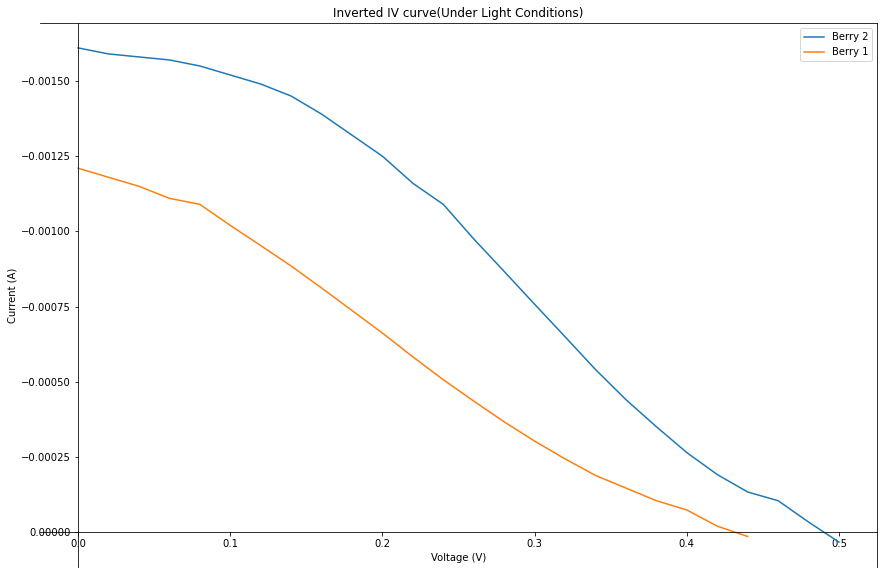

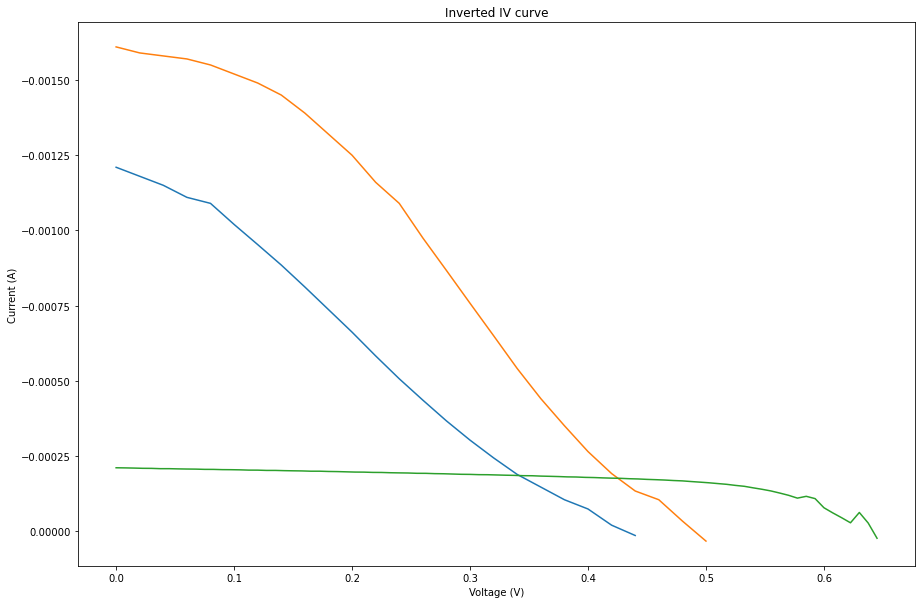

In [107]:


cleaned_dssc = [x for x in list(zip(dssc_l_v, dssc_l_i)) if x[0] >= 0 and x[1]<= 0.00005]
cleaned_dssc_v = [x[0] for x in cleaned_dssc]
cleaned_dssc_i = [x[1] for x in cleaned_dssc]

fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
    

cleanedb2 = [x for x in list(zip(b2l_v, b2l_i)) if x[0] >= 0 and x[1]<= 0.00005]
cleanedv2 = [x[0] for x in cleanedb2]
cleanedi2 = [x[1] for x in cleanedb2]


plt.plot(cleanedv2, cleanedi2, label="Berry 2")




cleanedb1 = [x for x in list(zip(b1l_v, b1l_i)) if x[0] >= 0 and x[1]<= .000025]
cleanedv = [x[0] for x in cleanedb1]
cleanedi = [x[1] for x in cleanedb1]


plt.plot(cleanedv, cleanedi, label="Berry 1")



plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.gca().invert_yaxis()



legend = ax.legend(loc='upper right')

plt.title("Inverted IV curve(Under Light Conditions)")
plt.show()







plt.plot(cleanedv, cleanedi, label="Berry 1")
plt.plot(cleanedv2, cleanedi2, label="Berry 2")
plt.plot(cleaned_dssc_v, cleaned_dssc_i, label="DSSC")
legend = ax.legend(loc='upper right')

plt.xlabel('Voltage (V)')
plt.ylabel("Current (A)")
plt.gca().invert_yaxis()


plt.title("Inverted IV curve")
plt.show()





